# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
import numpy as np

def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type='euclidean'):
    """
    Calculate distances between cluster centroids and data points.

    Parameters:
    - Cluster_Centroids: NumPy array with shape (K, num_features) representing K cluster centroids.
    - Data_points: NumPy array with shape (num_points, num_features) representing data points.
    - Distance_Type: String specifying the distance type ('euclidean' or 'pearson').

    Returns:
    - distances: NumPy array with shape (num_points, K) containing distances between each data point and each cluster centroid.
    """

    if Distance_Type == 'euclidean':
        # Euclidean distance
        distances = np.linalg.norm(Data_points[:, np.newaxis, :] - Cluster_Centroids, axis=2)

    elif Distance_Type == 'pearson':
        # Pearson correlation distance
        centered_data = Data_points - np.mean(Data_points, axis=0)
        centered_centroids = Cluster_Centroids - np.mean(Cluster_Centroids, axis=0)

        numerator = np.dot(centered_data, centered_centroids.T)
        denominator = np.sqrt(np.sum(centered_data ** 2, axis=1)[:, np.newaxis] * np.sum(centered_centroids ** 2, axis=1))

        distances = 1 - (numerator / denominator)

    else:
        raise ValueError("Invalid Distance_Type. Choose 'euclidean' or 'pearson'.")

    return distances



In [3]:
# # Example usage:
# K = 3  # Number of cluster centroids
# num_features = 2  # Number of features in data points and centroids
# num_points = 10  # Number of data points

# # Generate random data for testing

# # Cluster_Centroids = np.random.rand(K, num_features)
# # Data_points = np.random.rand(num_points, num_features)

# Cluster_Centroids = np.random.randint(low=0, high=100, size=(K, num_features))
# Data_points = np.random.randint(low=0, high=100, size=(num_points, num_features))

# print("Cluster Centroids:")
# print (Cluster_Centroids)

# print("\nData Points:")
# print (Data_points)

# # Calculate Euclidean distances
# euclidean_distances = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type='euclidean')

# # Calculate Pearson correlation distances
# pearson_distances = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type='pearson')

# print("\nEuclidean Distances:")
# print(euclidean_distances)

# print("\nPearson Correlation Distances:")
# print(pearson_distances)


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [4]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here 
       # write your your loop 
    
    return [ Final_Cluster_Distance , Cluster_Metric ]    

In [5]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type, max_iter=100, tol=1e-6):
    
    num_points, num_features = Data_points.shape
    
    #Initialize cluster centroids randomly
    #initial_indices = np.random.choice(num_points, Number_of_Clusters, replace=False)
    #Cluster_Centroids = Data_points[initial_indices, :]
    
    Cluster_Centroids = np.random.rand(Number_of_Clusters, num_features) * np.max(Data_points, axis=0)
    


    print ("\nCluster_Centroids:")
    print (Cluster_Centroids)

    for iteration in range(max_iter):
        # 1. Cluster Assignment
        distances = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        cluster_assignments = np.argmin(distances, axis=1)

        # Calculate mean square distance for each cluster
        mean_square_distances = np.array([np.mean(distances[cluster_assignments == k, k]) for k in range(Number_of_Clusters)])
        
        # Stopping condition
        if np.sum(mean_square_distances) < tol:
            break
        
        # 2. Update Centroids
        for k in range(Number_of_Clusters):
            Cluster_Centroids[k, :] = np.mean(Data_points[cluster_assignments == k, :], axis=0)
        
    # Calculate final cluster distances and cluster metric (Distortion Function)
    final_cluster_distances = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
    cluster_metric = np.sum(mean_square_distances)
    
    return final_cluster_distances, cluster_metric



In [3]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type, max_iter=100, tol=1e-6, tol_iter=2):
    
    num_points, num_features = Data_points.shape
    
    # Initialize cluster centroids randomly
    Cluster_Centroids = np.random.rand(Number_of_Clusters, num_features) * np.max(Data_points, axis=0)

#     print("\nCluster_Centroids:")
#     print(Cluster_Centroids)

    prev_mean_square_distances = None
    consecutive_small_diff = 0  # Counter for consecutive small differences

    for iteration in range(max_iter):
        # 1. Cluster Assignment
        distances = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        cluster_assignments = np.argmin(distances, axis=1)

        # Calculate mean square distance for each cluster
        mean_square_distances = np.array([np.mean(distances[cluster_assignments == k, k]) for k in range(Number_of_Clusters)])

        # Stopping condition
        if prev_mean_square_distances is not None and np.all(np.abs(mean_square_distances - prev_mean_square_distances) < tol):
            consecutive_small_diff += 1
            if consecutive_small_diff >= tol_iter:
                print(f"Stopping early at iteration {iteration + 1} due to consecutive small differences.")
                break
        else:
            consecutive_small_diff = 0

        # Update Centroids
        for k in range(Number_of_Clusters):
            Cluster_Centroids[k, :] = np.mean(Data_points[cluster_assignments == k, :], axis=0)

        prev_mean_square_distances = mean_square_distances.copy()

    # Calculate final cluster distances and cluster metric (Distortion Function)
    final_cluster_distances = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
    cluster_metric = np.sum(mean_square_distances)

    return final_cluster_distances, cluster_metric


Data Points:
[[5 9]
 [4 5]
 [7 1]
 [8 3]
 [5 2]
 [4 2]
 [2 8]
 [4 8]
 [5 6]
 [0 9]
 [8 2]
 [3 6]
 [7 0]
 [0 3]
 [3 5]
 [6 6]
 [3 8]
 [9 6]
 [5 1]
 [6 1]]


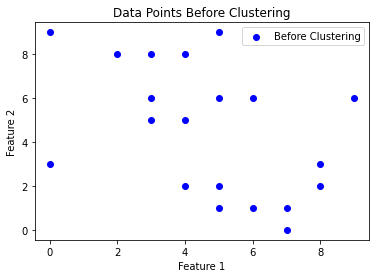

Stopping early at iteration 4 due to consecutive small differences.


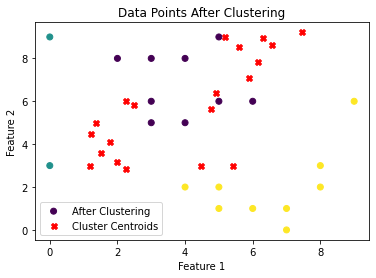

Final Cluster Distances:
[[2.48451997 5.83095189 7.1707568 ]
 [1.78124662 4.12310563 3.94092174]
 [6.56214358 8.60232527 1.09431753]
 [5.58326423 8.54400375 1.75682092]
 [4.90527557 6.40312424 1.55555556]
 [4.77906959 5.65685425 2.55555556]
 [2.24982853 2.82842712 7.53346444]
 [1.22726234 4.47213595 6.52156915]
 [1.35628396 5.         4.29182398]
 [4.47903208 3.         9.59037583]
 [6.30304649 8.94427191 1.44444444]
 [1.18112731 3.         5.35181981]
 [7.45769964 9.21954446 2.04878766]
 [5.42172129 3.         6.63138814]
 [1.98761598 3.16227766 4.65209365]
 [2.24982853 6.         4.03839597]
 [1.5112745  3.60555128 6.97437992]
 [5.16995117 9.         4.68778291]
 [5.88364546 7.07106781 1.84925744]
 [6.15138246 7.81024968 1.1439589 ]]

Cluster Metric (Distortion Function): 6.796163184057578


In [4]:
### QUICK TEST ###

# Generate random data points
np.random.seed(456)
data_points = np.random.randint(low=0 ,high= 10,size= (20, 2))  # 100 points in 2D space
print("\nData Points:")
print (data_points)
# Number of clusters
num_clusters = 3

# Distance type ('euclidean' or 'pearson')
distance_type = 'euclidean'

# Plot data points before clustering
plt.scatter(data_points[:, 0], data_points[:, 1], color='blue', label='Before Clustering')
plt.title('Data Points Before Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Run K-means clustering
final_cluster_distances, cluster_metric = GUC_Kmean(data_points, num_clusters, distance_type)

# Extract cluster assignments from final distances
cluster_assignments = np.argmin(final_cluster_distances, axis=1)

# Plot data points after clustering
plt.scatter(data_points[:, 0], data_points[:, 1], c=cluster_assignments, cmap='viridis', label='After Clustering')
plt.scatter(final_cluster_distances[:, 0], final_cluster_distances[:, 1], c='red', marker='X', label='Cluster Centroids')
plt.title('Data Points After Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# # Plot data points after clustering
# plt.scatter(data_points[:, 0], data_points[:, 1], c=cluster_assignments, cmap='viridis', label='After Clustering')
# plt.scatter(Cluster_Centroids[:, 0], Cluster_Centroids[:, 1], c='red', marker='X', label='Final Cluster Centroids')
# plt.title('Data Points After Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()


print(f'Final Cluster Distances:\n{final_cluster_distances}\n')
print(f'Cluster Metric (Distortion Function): {cluster_metric}')


## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [5]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [8]:
from sklearn.cluster import KMeans

> #### 2.1. helper Display function 

In [6]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(np.mean(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100))

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

In [7]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

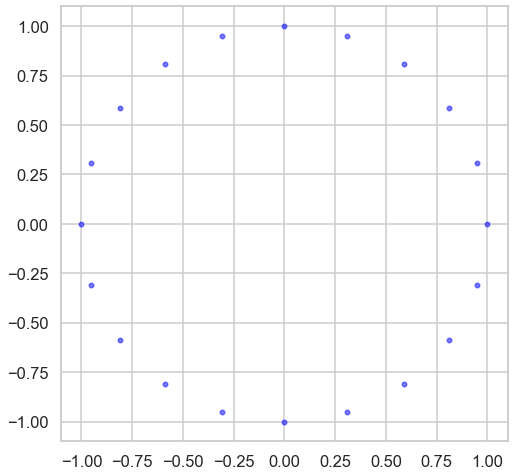

In [8]:

# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

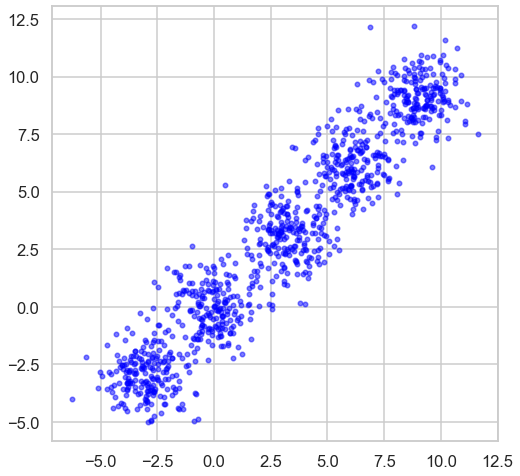

In [9]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
Y, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Y)

#### 2.3. Example 3 : moons Data Gen and display 

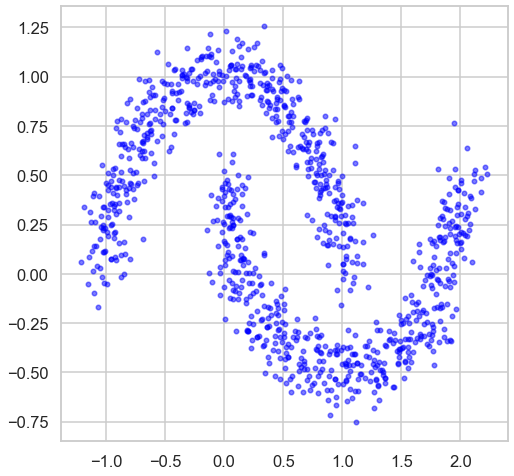

In [10]:
n_samples = 1000
Z, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(Z)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

/Users/mahmoudelnakib/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mahmoudelnakib/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/mahmoudelnakib/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


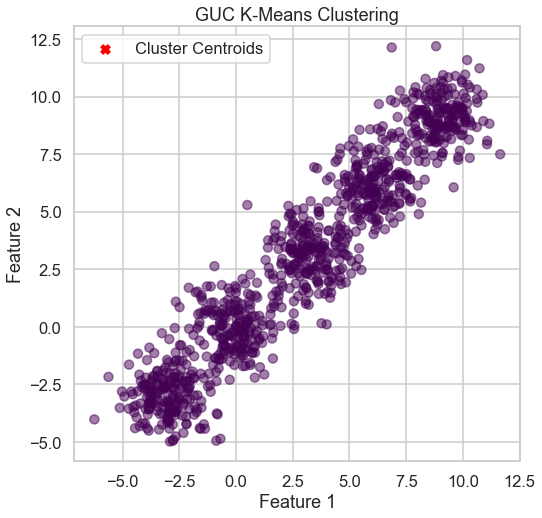

Final Cluster Metric (Distortion Function): nan


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# Generate sample data
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9, 9)]
Y, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

# Apply GUC_Kmean function
Number_of_Clusters = 4
Distance_Type = 'euclidean'
final_cluster_distances, cluster_metric = GUC_Kmean(Y, Number_of_Clusters, Distance_Type)

# Plot the results
plt.scatter(Y[:, 0], Y[:, 1], c=np.argmin(final_cluster_distances, axis=1), cmap='viridis', alpha=0.5)
plt.scatter(final_cluster_distances[:, 0], final_cluster_distances[:, 1], c='red', marker='X', label='Cluster Centroids')
plt.title('GUC K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(f"Final Cluster Metric (Distortion Function): {cluster_metric}")



Cluster_Centroids:
[[ 0.84294939  1.30528031]
 [ 3.20142513 11.92155325]
 [ 3.65351066  1.59094298]
 [10.2036764   1.67271407]
 [ 6.8847388   9.54297705]
 [ 3.81039261  3.7894022 ]
 [ 5.23878572  6.38549961]
 [ 7.10560428  4.53689789]]


IndexError: string index out of range

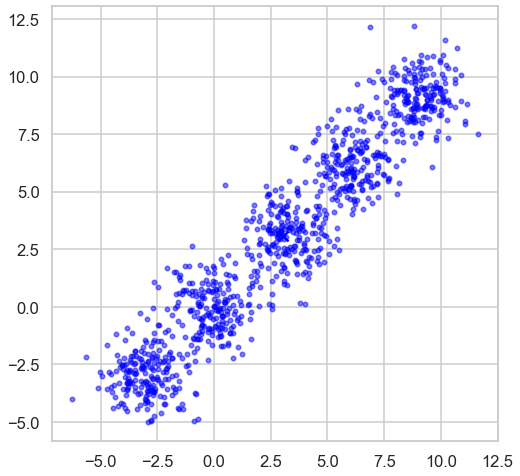

In [25]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
# def display_cluster(X, cluster_labels=[], num_clusters=0):
#     color = 'brgcmyk'  # List colors
#     alpha = 0.5  # Color opacity
#     s = 20
#     if num_clusters == 0:
#         plt.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
#     else:
#         for i in range(num_clusters):
#             plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], c=color[i], alpha=alpha, s=s)
#             plt.scatter(np.mean(X[cluster_labels == i, 0]), np.mean(X[cluster_labels == i, 1]),
#                         c=color[i], marker='x', s=100)


# Apply K-means clustering
num_clusters = 8
distance_type = 'euclidean'
final_cluster_distances, cluster_metric = GUC_Kmean(Y, num_clusters, distance_type)

# Find cluster labels based on the minimum distance
cluster_labels = np.argmin(final_cluster_distances, axis=1)

# Display the clusters
display_cluster(Y, cluster_labels=cluster_labels, num_clusters=num_clusters)
plt.title('K-means Clustering Result')
plt.show()


Stopping early at iteration 15 due to consecutive small differences.


AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

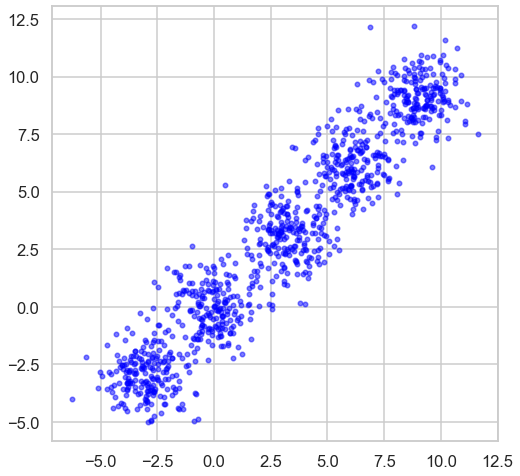

In [11]:

# Apply K-means clustering
num_clusters = 4
distance_type = 'euclidean'
final_cluster_distances, cluster_metric = GUC_Kmean(Y, num_clusters, distance_type)

# Find cluster labels based on the minimum distance
cluster_labels = np.argmin(final_cluster_distances, axis=1)

# Display the clusters
display_cluster(Y)
# plt.title('Original Data')
# plt.show()

display_cluster(Y, km=cluster_labels, num_clusters=num_clusters)
# plt.title('K-means Clustering Result')
# plt.show()


In [23]:
# # Apply GUC_Kmean function
# num_clusters = 2  # Number of clusters
# distance_type = 'euclidean'
# km = KMeans(n_clusters=num_clusters, random_state=42).fit(X)
# final_cluster_distances, cluster_metric = GUC_Kmean(X, num_clusters, distance_type)

# # Display the clustered data
# display_cluster(X, km=km, num_clusters=num_clusters)

# plt.show()


In [24]:
# # Apply GUC_Kmean function
# num_clusters = 2  # Number of clusters
# distance_type = 'euclidean'
# km = KMeans(n_clusters=num_clusters, random_state=42).fit(Y)
# final_cluster_distances, cluster_metric = GUC_Kmean(Y, num_clusters, distance_type)

# # Display the clustered data
# display_cluster(Y, km=km, num_clusters=num_clusters)

# plt.show()


In [25]:
# # Apply GUC_Kmean function
# num_clusters = 2  # Number of clusters
# distance_type = 'euclidean'
# km = KMeans(n_clusters=num_clusters, random_state=42).fit(Z)
# final_cluster_distances, cluster_metric = GUC_Kmean(Z, num_clusters, distance_type)

# # Display the clustered data
# display_cluster(Z, km=km, num_clusters=num_clusters)

# plt.show()


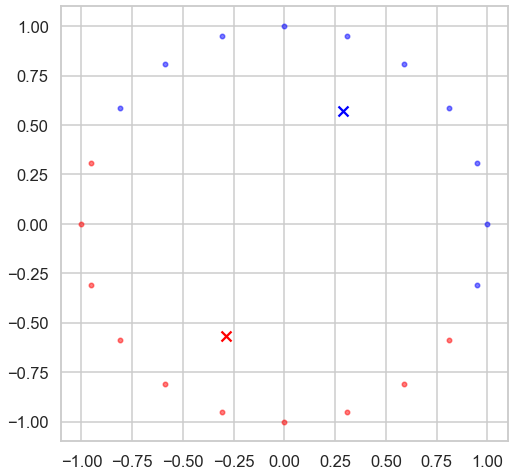

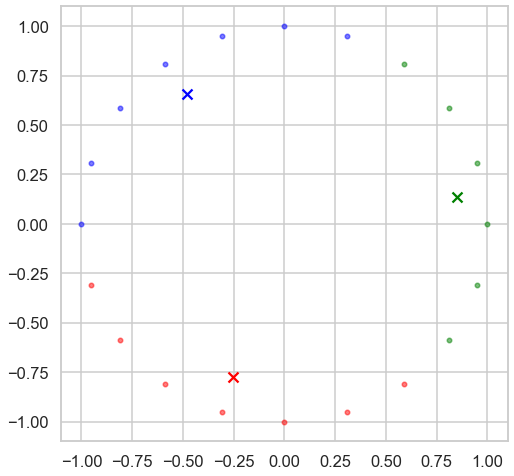

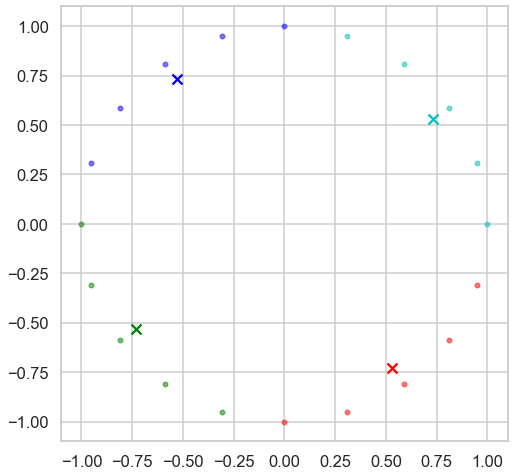

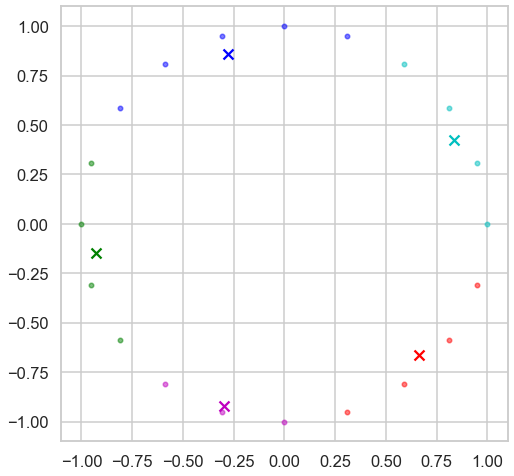

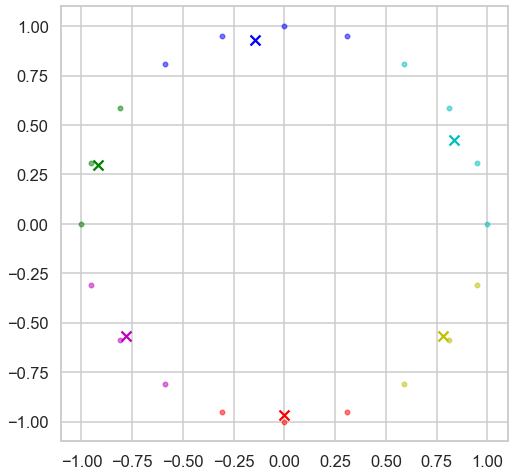

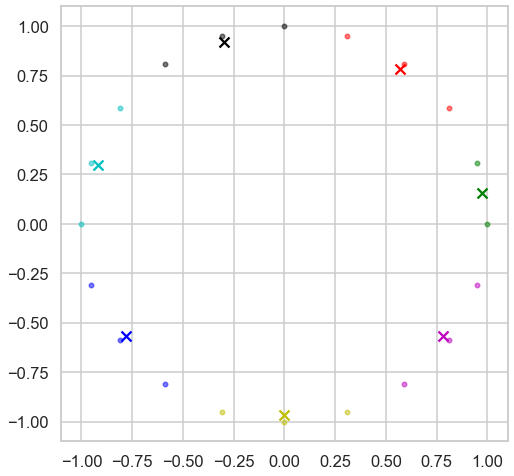

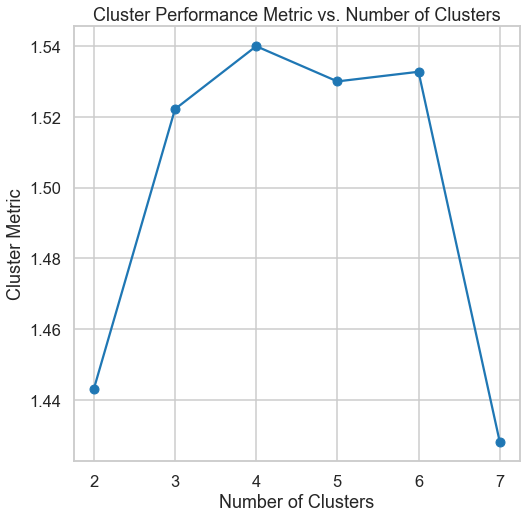

In [26]:
# Vary the number of clusters and record cluster metrics
num_clusters_range = range(2, 8)  # Try different numbers of clusters
cluster_metrics = []

for num_clusters in num_clusters_range:
    _, cluster_metric = GUC_Kmean(X, num_clusters, 'euclidean')
    cluster_metrics.append(cluster_metric)
    
    distance_type = 'euclidean'
    km = KMeans(n_clusters=num_clusters, random_state=42).fit(X)
    final_cluster_distances, cluster_metric = GUC_Kmean(X, num_clusters, distance_type)

    # Display the clustered data
    display_cluster(X, km=km, num_clusters=num_clusters)

    plt.show()

    
    

# Plot the Cluster Performance Metric versus the Number of Clusters
plt.plot(num_clusters_range, cluster_metrics, marker='o')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.show()


In [28]:
# Vary the number of clusters and record cluster metrics
num_clusters_range = range(2, 8)  # Try different numbers of clusters
cluster_metrics = []

for num_clusters in num_clusters_range:
    _, cluster_metric = GUC_Kmean(X, num_clusters, 'euclidean')
    cluster_metrics.append(cluster_metric)
    
    distance_type = 'euclidean'
    km = KMeans(n_clusters=num_clusters, random_state=42).fit(Y)
    final_cluster_distances, cluster_metric = GUC_Kmean(Y, num_clusters, distance_type)

    # Display the clustered data
    display_cluster(Y, km=km, num_clusters=num_clusters)

    plt.show()
  

# Plot the Cluster Performance Metric versus the Number of Clusters
plt.plot(num_clusters_range, cluster_metrics, marker='o')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.show()



Cluster_Centroids:
[[0.39418308 0.36669624]
 [0.29746282 0.01189706]]


NameError: name 'KMeans' is not defined

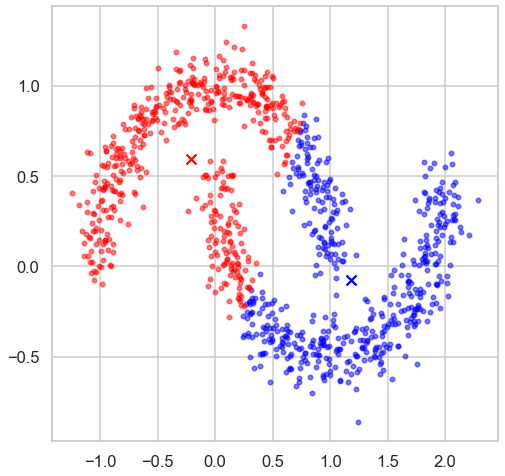

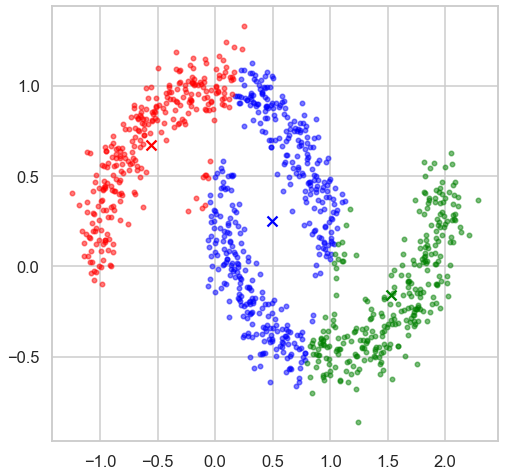

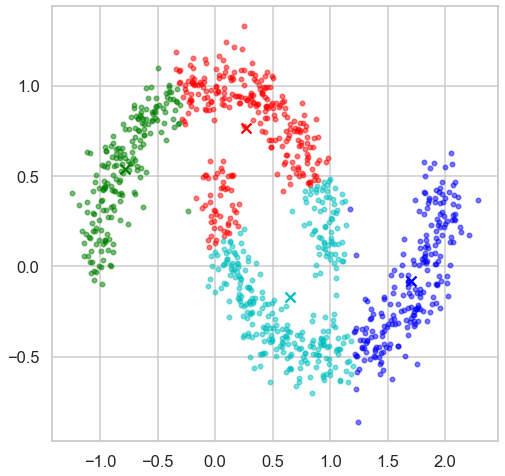

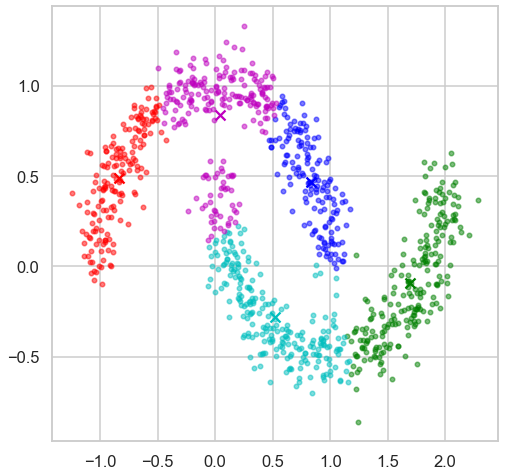

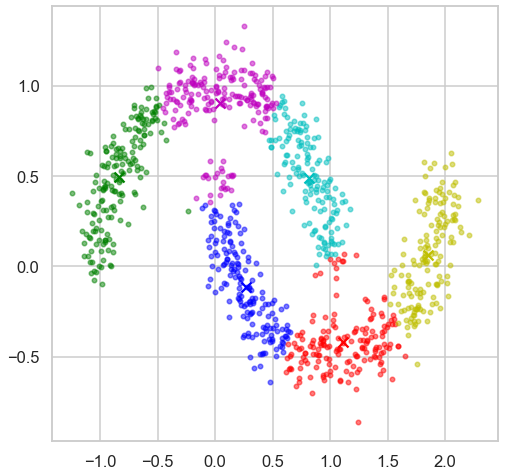

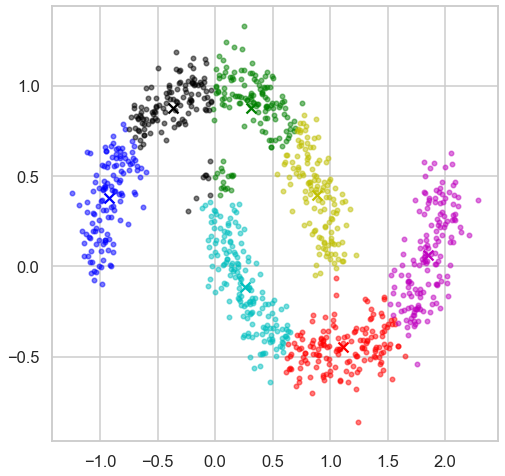

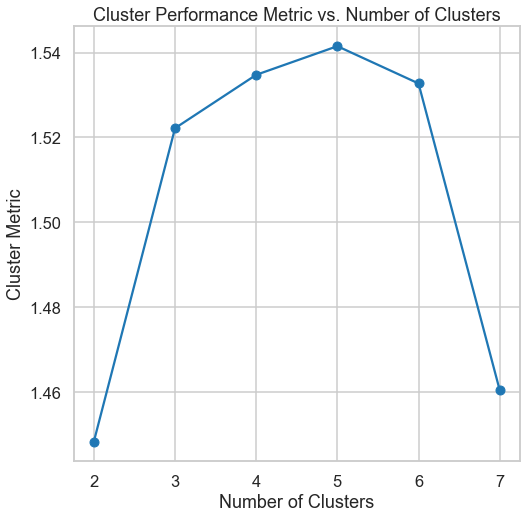

In [134]:
# Vary the number of clusters and record cluster metrics
num_clusters_range = range(2, 8)  # Try different numbers of clusters
cluster_metrics = []

for num_clusters in num_clusters_range:
    _, cluster_metric = GUC_Kmean(X, num_clusters, 'euclidean')
    cluster_metrics.append(cluster_metric)
    
    distance_type = 'euclidean'
    km = KMeans(n_clusters=num_clusters, random_state=42).fit(Z)
    final_cluster_distances, cluster_metric = GUC_Kmean(Z, num_clusters, distance_type)

    # Display the clustered data
    display_cluster(Z, km=km, num_clusters=num_clusters)

    plt.show()

    
    

# Plot the Cluster Performance Metric versus the Number of Clusters
plt.plot(num_clusters_range, cluster_metrics, marker='o')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.show()


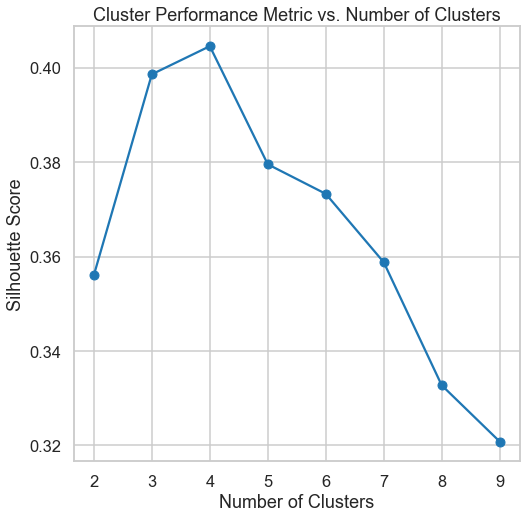

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the GUC_Kmean function here...

# Calculate the silhouette score for a given clustering
def calculate_silhouette(X, labels):
    return silhouette_score(X, labels)

# Vary the number of clusters and record silhouette scores
num_clusters_range = range(2, 10)  # Try different numbers of clusters
silhouette_scores = []

for num_clusters in num_clusters_range:
    km = KMeans(n_clusters=num_clusters, random_state=42).fit(X)
    final_cluster_distances, _ = GUC_Kmean(X, num_clusters, 'euclidean')
    silhouette = calculate_silhouette(X, km.labels_)
    silhouette_scores.append(silhouette)

# Plot the Cluster Performance Metric (Silhouette Score) versus the Number of Clusters
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [100]:
dataset = pd.read_csv('/Users/mahmoudelnakib/Desktop/Machine Learning/Assignment 1/Customer data.csv')

In [101]:
dataset

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [136]:
# Extract relevant features for clustering (adjust as needed)
features = dataset[['Age', 'Income', 'Occupation']]

# Define the GUC_Kmean function here...

# Vary the number of clusters and record cluster metrics for Euclidean distance
num_clusters_range = range(2, 11)
cluster_metrics_euclidean = []

for num_clusters in num_clusters_range:
    _, cluster_metric = GUC_Kmean(features, num_clusters, 'euclidean')
    cluster_metrics_euclidean.append(cluster_metric)

# Vary the number of clusters and record cluster metrics for Pearson correlation distance
cluster_metrics_pearson = []

for num_clusters in num_clusters_range:
    _, cluster_metric = GUC_Kmean(features, num_clusters, 'pearson')
    cluster_metrics_pearson.append(cluster_metric)

# Plot the Cluster Metric versus the Number of Clusters for Euclidean distance
plt.plot(num_clusters_range, cluster_metrics_euclidean, marker='o', label='Euclidean')
plt.title('Cluster Metric vs. Number of Clusters (Euclidean Distance)')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.legend()
plt.show()

# Plot the Cluster Metric versus the Number of Clusters for Pearson correlation distance
plt.plot(num_clusters_range, cluster_metrics_pearson, marker='o', label='Pearson Correlation')
plt.title('Cluster Metric vs. Number of Clusters (Pearson Correlation Distance)')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.legend()
plt.show()


TypeError: '(array([529, 632]), slice(None, None, None))' is an invalid key